### Librerias 

In [1]:
import pandas as pd
import numpy as np

# Gráficos

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib

plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings

import warnings
warnings.filterwarnings('ignore')


# Regresión Lineal Simple Ejemplo 1

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


### 1. Conjunto de datos

In [3]:
#cargamos los datos de entrada
data = pd.read_csv('articulos_ml.csv')
data.describe()


,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


Aqui vemos que la media de palabras en los artículos es de 1808. El artículo más corto tiene 250 palabras y el más extenso 8401. Intentaremos ver con nuestra relación lineal, si hay una correlación entre la cantidad de palabras del texto y la cantidad de Shares obtenidos.

### 2. Visualización

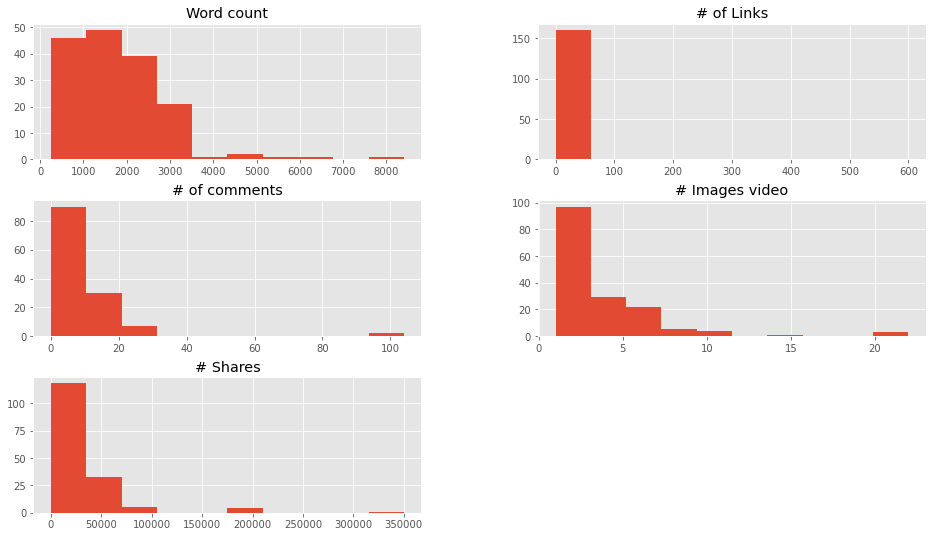

In [4]:
data.drop(['Title','url', 'Elapsed days'],1).hist()
plt.show()


Vamos a filtrar los datos de cantidad de palabras para quedarnos con los registros con menos de 3500 palabras y también con los que tengan Cantidad de compartidos menos a 80.000. Lo gratificaremos pintando en azul los puntos con menos de 1808 palabras (la media) y en naranja los que tengan más.

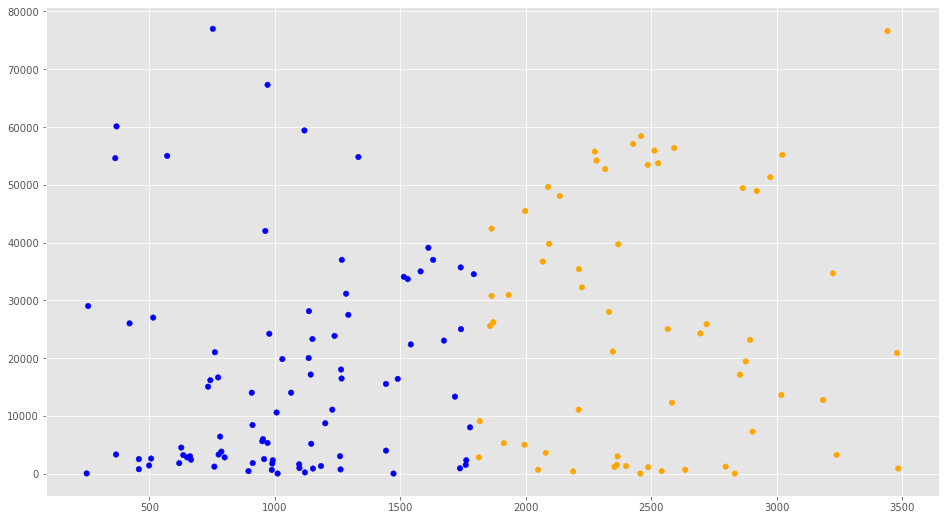

In [5]:
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]
 
colores=['orange','blue']
tamanios=[30,60]
 
f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values
 
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras

asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()


### 3. Regresión Lineal con Python y Sklearn

Vamos a crear nuestros datos de entrada por el momento sólo Word Count y como etiquetas los # Shares. Creamos el objeto LinearRegression y lo hacemos “encajar” (entrenar) con el método fit(). Finalmente imprimimos los coeficientes y puntajes obtenidos.

In [6]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)

# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)

# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))

# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))


Coefficients: 
 [5.69765366]
Independent term: 
 11200.303223074163
Mean squared error: 372888728.34
Variance score: 0.06


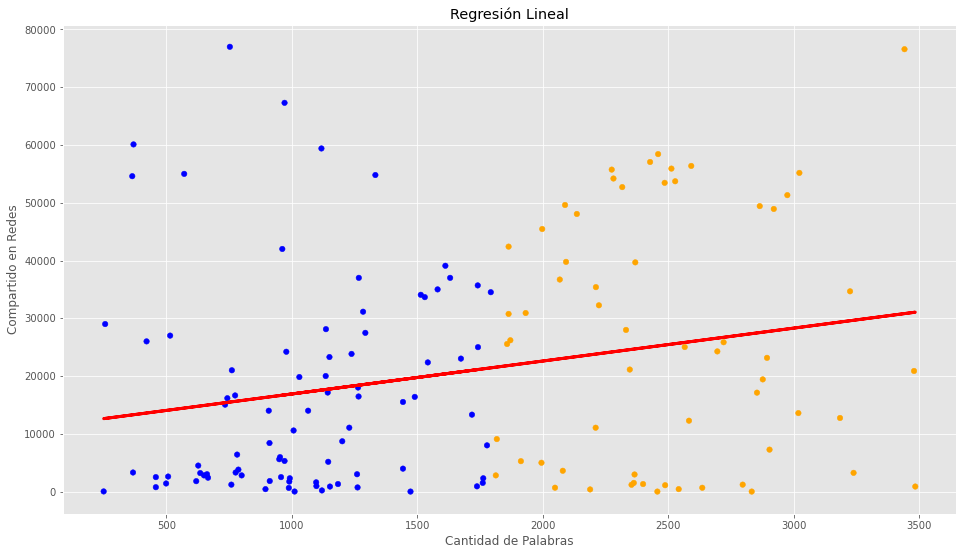

In [7]:
#Vemos la recta obtenida 

plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Palabras')
plt.ylabel('Compartido en Redes')
plt.title('Regresión Lineal')

plt.show()


In [8]:
#Vamos a intentar probar nuestro algoritmo, suponiendo que quisiéramos predecir
#cuántos “compartir” obtendrá un articulo sobre ML de 2000 palabras.

y_share = regr.predict([[2000]])
print(int(y_share))


22595


# Regresión Lineal Multiple Ejemplo 1

In [9]:
#Vamos a intentar mejorar el Modelo, con una dimensión más: 
# Para poder graficar en 3D, haremos una variable nueva que será la suma de los enlaces, comentarios e imágenes

suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])

dataX2 =  pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values


Creamos un nuevo objeto de Regresión lineal con SKLearn pero esta vez tendrá las dos dimensiones que entrenar: las que contiene XY_train. Al igual que antes, imprimimos los coeficientes y puntajes obtenidos:

In [10]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()

# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)

# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))


Coefficients: 
 [   6.63216324 -483.40753769]
Mean squared error: 352122816.48
Variance score: 0.11


Como vemos, obtenemos 2 coeficientes (cada uno correspondiente a nuestras 2 variables predictivas), pues ahora lo que graficamos no será una linea si no, un plano en 3 Dimensiones.

El error obtenido sigue siendo grande, aunque algo mejor que el anterior y el puntaje de Varianza mejora casi el doble del anterior (aunque sigue siendo muy malo, muy lejos del 1).

Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

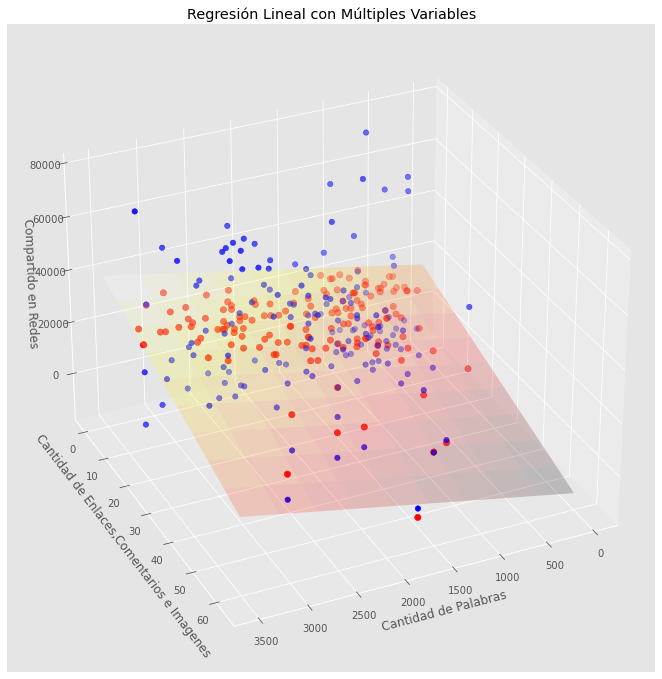

In [11]:
fig = plt.figure()
ax = Axes3D(fig)

# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 

# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)

# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)

# Graficamos en rojo, los puntos que 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)

# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)
        
ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')


Veamos ahora, que predicción tendremos para un artículo de 2000 palabras, con 10 enlaces, 4 comentarios y 6 imágenes.

In [12]:
z_pred = regr2.predict([[2000, 10+4+6]])
print(int(z_pred))


20518


En este ejemplo utilizamos información de artículos sobre Machine Learning con algunos datos ficticios en nuestro .csv pero si quisieramos tratar de mejorar las predicciones, deberiamos utilizar más de 2 variables (recordemos que aqui lo hicimos para poder graficar en 3D).

Atención: también es posible, que no exista ninguna relación nunca entre nuestras variables de entrada y el éxito en Shares del artículo con lo cual nunca podremos predecir con certeza esta salida. Pero así son los experimentos, en ocasiones hay éxito y en otras no no, solo resta aprender y mejorar en el futuro. 

# Regresión Lineal Simple Ejemplo 2

Supóngase que un analista de deportes quiere saber si existe una relación entre el número Puntos de un equipo de fútbol y el número de Goles que consigue. En caso de existir y de establecer un modelo, podría predecir el resultado del partido

### 1. Conjunto de datos

In [13]:
Equipos = ['Huachipato','Colo_Colo','Uc','Cobresal','Ñublense','Ohiggins','Curicó','Audax',
'Palestino','Uch','Coquimbo','Magallanes','Union_Esp','U_Calera','Copiapo','Everton',
'San_Marcos','Iquique','Cobreloa','Antofagasta','Serena','San_Felipe','San_Luis',
'Wanderes','Recoleta','Barnechea','S_Morning','Santa_Cruz','Rangers','Concepcion']
Puntos = [5669,  5730, 5575, 5687, 5545, 5580, 5490, 5470, 5524, 5620,
          5600, 5456, 5599, 5592, 5573, 5556, 5532, 5519, 5391, 5599,
          5507, 5518, 5434, 5482, 5441, 5555, 5411, 5476, 5408, 5411]

Goles = [825, 895, 757, 710, 792, 728, 864, 734, 756, 665, 699, 652, 648, 725,
        647, 723, 664, 699, 711, 753, 636, 635, 613, 639, 720, 667, 612, 560,
        600, 555]

df = pd.DataFrame({'Equipos': Equipos, 'Puntos': Puntos, 'Goles': Goles})
df.head(5)


,Equipos,Puntos,Goles
0,Huachipato,5669,825
1,Colo_Colo,5730,895
2,Uc,5575,757
3,Cobresal,5687,710
4,Ñublense,5545,792


### 2. Gráfico

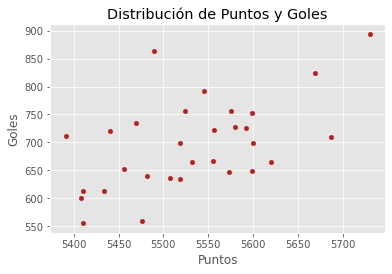

In [14]:
fig, ax = plt.subplots(figsize=(6, 3.84))

df.plot(
    x    = 'Puntos',
    y    = 'Goles',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de Puntos y Goles');


In [15]:
# Correlación lineal entre las dos variables

corr_test = pearsonr(x = df['Puntos'], y =  df['Goles'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])


Coeficiente de correlación de Pearson:  0.5516765482032562
P-value:  0.0015764996656516734


El gráfico y el test de correlación muestran una relación lineal, de intensidad considerable (r = 0.55) y significativa (p-value = 0.0015). Tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir el número de Goles en función del número de Puntos del equipo.

### 3. Ajuste del modelo

Se ajusta un modelo empleando como variable respuesta Goles y como predictor Puntos. Como en todo estudio predictivo, no solo es importante ajustar el modelo, sino también cuantificar su capacidad para predecir nuevas observaciones. Para poder hacer esta evaluación, se dividen los datos en dos grupos, uno de entrenamiento y otro de test.

### 3.1  Scikit-learn

In [16]:
X = df[['Puntos']]
y = df['Goles']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True)

# Creación del modelo

modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)


LinearRegression()

In [17]:
# Información del modelo

print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente R^2:", modelo.score(X, y))


Intercept: [-1534.4796082]
Coeficiente: [('Puntos', 0.4012535376209019)]
Coeficiente R^2: 0.26934273139386433


In [18]:
#Una vez entrenado el modelo, se evalúa la capacidad predictiva empleando 
#el conjunto de test.

predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False)
print("")
print(f"El error (rmse) de test es: {rmse}")


[[660.37724259]
 [712.54020248]
 [690.47125791]]

El error (rmse) de test es: 81.25942699599395


### 3.2 Statsmodels

La implementación de regresión lineal de Statsmodels, es más completa que la de Scikitlearn ya que, además de ajustar el modelo, permite calcular los test estadísticos y análisis necesarios para verificar que se cumplen las condiciones sobre las que se basa este tipo de modelos. Statsmodels tiene dos formas de entrenar el modelo:

1. Indicando la fórmula del modelo y pasando los datos de entrenamiento como un dataframe que incluye la variable respuesta y los predictores. 

2. Pasar dos matrices, una con los predictores y otra con la variable respuesta. Esta es igual a la empleada por Scikitlearn con la diferencia de que a la matriz de predictores hay que añadirle una primera columna de 1s.

In [19]:
# División de los datos en train y test

X = df[['Puntos']]
y = df['Goles']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True)


In [20]:
# Creación del modelo utilizando el modo fórmula (similar a R)

#datos_train_R = pd.DataFrame(np.hstack((X_train, y_train)), 
                #columns=['Puntos', 'Goles'])
#modelo_R = smf.ols(formula = 'Goles ~Puntos', data = datos_train_R)
#modelo_R = modelo_R.fit()
#print(modelo_R.summary())


In [21]:
# Creación del modelo utilizando matrices como en scikitlearn
# A la matriz de predictores se le tiene que añadir una columna de 1s 
#para el intercept del modelo

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     5.353
Date:                Wed, 25 Jan 2023   Prob (F-statistic):             0.0304
Time:                        15:56:39   Log-Likelihood:                -134.05
No. Observations:                  24   AIC:                             272.1
Df Residuals:                      22   BIC:                             274.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1534.4796    958.830     -1.600      0.1

### 3.3 Intervalos de confianza

In [22]:
# Intervalos de confianza para los coeficientes del modelo

modelo.conf_int(alpha=0.05)


array([[-3.52297218e+03,  4.54012960e+02],
       [ 4.15804084e-02,  7.60926667e-01]])

### 3.4 Predicciones

Una vez entrenado el modelo, se pueden obtener predicciones para nuevos datos. Los modelos de statsmodels permiten calcular las predicciones de dos formas:

1. predict(): devuelve únicamente el valor de las predicciones.

2. get_prediction().summary_frame(): devuelve, además de las predicciones, los intervalos de confianza asociados.

In [23]:
# Predicciones con intervalo de confianza del 95%

predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(5)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,747.449260,30.807725,683.557949,811.340571,593.818759,901.079762
1,665.192285,15.901842,632.213884,698.170686,521.638092,808.746478
2,701.706357,15.808332,668.921883,734.490831,558.196591,845.216123
3,709.330174,17.667701,672.689605,745.970743,564.890697,853.769652
4,645.932115,21.333408,601.689335,690.174895,499.379548,792.484682


### 4. Representación gráfica del modelo 

Además de la línea de mínimos cuadrados, es recomendable incluir los límites superior e inferior del intervalo de confianza. Esto permite identificar la región en la que, según el modelo generado y para un determinado nivel de confianza, se encuentra el valor promedio de la variable respuesta.

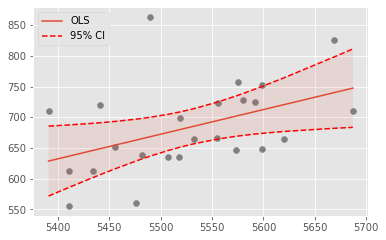

In [24]:
# Predicciones con intervalo de confianza del 95%

predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo

fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = 'gray')
ax.plot(predicciones['x'], predicciones['mean'], linestyle='-', label='OLS')
ax.plot(predicciones['x'], predicciones['mean_ci_lower'], linestyle='--', color='red', label='95% CI')
ax.plot(predicciones['x'], predicciones['mean_ci_upper'], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones['mean_ci_lower'], predicciones['mean_ci_upper'], alpha=0.1)
ax.legend();


### 5. Error de test

In [25]:
# Error de test del modelo 

X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")



El error (rmse) de test es: 81.25942699599571


### 6. Interpretación 

La columna (coef) devuelve el valor estimado para los dos parámetros de la ecuación del modelo lineal ( $\beta^0$ y  $\beta^1$) que equivalen a la ordenada en el origen (intercept o const) y a la pendiente. Se muestran también los errores estándar, el valor del estadístico t y el p-value (dos colas) de cada uno de los dos parámetros. Esto permite determinar si los predictores son significativamente distintos de $0$, es decir, que tienen importancia en el modelo. Para el modelo generado, tanto la ordenada en el origen como la pendiente son significativas (p-values $< 0.05$).

El valor de R-squared indica que el modelo es capaz de explicar el $19.6\%$ de la variabilidad observada en la variable respuesta (Goles). Además, el p-value obtenido en el test F (Prob (F-statistic) = 0.0304) indica que sí hay evidencias de que la varianza explicada por el modelo es superior a la esperada por azar (varianza total).

El modelo lineal generado sigue la ecuación:

            Goles = -1534.4796 + 0.4013 Puntos
 
Por cada unidad que se incrementa el número de Puntos, el número de Goles aumenta en promedio 0.4013.

El error de test del modelo es de 81.25. Las predicciones del modelo final se alejan en promedio 81.25 unidades del valor real.

# Regresión Lineal Multiple Ejemplo 2

Supóngase que el departamento de ventas de una empresa quiere estudiar la influencia que tiene la publicidad a través de distintos canales sobre el número de ventas de un producto. Se dispone de un conjunto de datos que contiene los ingresos (en millones) conseguido por ventas en 200 regiones, así como la cantidad de presupuesto, también en millones, destinado a anuncios por radio, TV y periódicos en cada una de ellas.

### 1. Datos

In [26]:
tv = [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8, 66.1, 214.7,
      23.8, 97.5, 204.1, 195.4, 67.8, 281.4, 69.2, 147.3, 218.4, 237.4, 13.2,
      228.3, 62.3, 262.9, 142.9, 240.1, 248.8, 70.6, 292.9, 112.9, 97.2, 265.6,
      95.7, 290.7, 266.9, 74.7, 43.1, 228.0, 202.5, 177.0, 293.6, 206.9, 25.1,
      175.1, 89.7, 239.9, 227.2, 66.9, 199.8, 100.4, 216.4, 182.6, 262.7, 198.9,
      7.3, 136.2, 210.8, 210.7, 53.5, 261.3, 239.3, 102.7, 131.1, 69.0, 31.5,
      139.3, 237.4, 216.8, 199.1, 109.8, 26.8, 129.4, 213.4, 16.9, 27.5, 120.5,
      5.4, 116.0, 76.4, 239.8, 75.3, 68.4, 213.5, 193.2, 76.3, 110.7, 88.3, 109.8,
      134.3, 28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4,
      296.4, 280.2, 187.9, 238.2, 137.9, 25.0, 90.4, 13.1, 255.4, 225.8, 241.7, 175.7,
      209.6, 78.2, 75.1, 139.2, 76.4, 125.7, 19.4, 141.3, 18.8, 224.0, 123.1, 229.5,
      87.2, 7.8, 80.2, 220.3, 59.6, 0.7, 265.2, 8.4, 219.8, 36.9, 48.3, 25.6, 273.7,
      43.0, 184.9, 73.4, 193.7, 220.5, 104.6, 96.2, 140.3, 240.1, 243.2, 38.0, 44.7,
      280.7, 121.0, 197.6, 171.3, 187.8, 4.1, 93.9, 149.8, 11.7, 131.7, 172.5, 85.7,
      188.4, 163.5, 117.2, 234.5, 17.9, 206.8, 215.4, 284.3, 50.0, 164.5, 19.6, 168.4,
      222.4, 276.9, 248.4, 170.2, 276.7, 165.6, 156.6, 218.5, 56.2, 287.6, 253.8, 205.0,
      139.5, 191.1, 286.0, 18.7, 39.5, 75.5, 17.2, 166.8, 149.7, 38.2, 94.2, 177.0,
      283.6, 232.1]

radio = [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6, 5.8, 24.0, 35.1,
         7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7, 5.1, 15.9, 16.9, 12.6, 3.5,
         29.3, 16.7, 27.1, 16.0, 28.3, 17.4, 1.5, 20.0, 1.4, 4.1, 43.8, 49.4, 26.7,
         37.7, 22.3, 33.4, 27.7, 8.4, 25.7, 22.5, 9.9, 41.5, 15.8, 11.7, 3.1, 9.6,
         41.7, 46.2, 28.8, 49.4, 28.1, 19.2, 49.6, 29.5, 2.0, 42.7, 15.5, 29.6, 42.8,
         9.3, 24.6, 14.5, 27.5, 43.9, 30.6, 14.3, 33.0, 5.7, 24.6, 43.7, 1.6, 28.5,
         29.9, 7.7, 26.7, 4.1, 20.3, 44.5, 43.0, 18.4, 27.5, 40.6, 25.5, 47.8, 4.9,
         1.5, 33.5, 36.5, 14.0, 31.6, 3.5, 21.0, 42.3, 41.7, 4.3, 36.3, 10.1, 17.2,
         34.3, 46.4, 11.0, 0.3, 0.4, 26.9, 8.2, 38.0, 15.4, 20.6, 46.8, 35.0, 14.3,
         0.8, 36.9, 16.0, 26.8, 21.7, 2.4, 34.6, 32.3, 11.8, 38.9, 0.0, 49.0, 12.0,
         39.6, 2.9, 27.2, 33.5, 38.6, 47.0, 39.0, 28.9, 25.9, 43.9, 17.0, 35.4, 33.2,
         5.7, 14.8, 1.9, 7.3, 49.0, 40.3, 25.8, 13.9, 8.4, 23.3, 39.7, 21.1, 11.6, 43.5,
         1.3, 36.9, 18.4, 18.1, 35.8, 18.1, 36.8, 14.7, 3.4, 37.6, 5.2, 23.6, 10.6, 11.6,
         20.9, 20.1, 7.1, 3.4, 48.9, 30.2, 7.8, 2.3, 10.0, 2.6, 5.4, 5.7, 43.0, 21.3, 45.1,
         2.1, 28.7, 13.9, 12.1, 41.1, 10.8, 4.1, 42.0, 35.6, 3.7, 4.9, 9.3, 42.0, 8.6]

periodico = [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2, 24.2, 4.0,
             65.9, 7.2, 46.0, 52.9, 114.0, 55.8, 18.3, 19.1, 53.4, 23.5, 49.6, 26.2,
             18.3, 19.5, 12.6, 22.9, 22.9, 40.8, 43.2, 38.6, 30.0, 0.3, 7.4, 8.5, 5.0,
             45.7, 35.1, 32.0, 31.6, 38.7, 1.8, 26.4, 43.3, 31.5, 35.7, 18.5, 49.9,
             36.8, 34.6, 3.6, 39.6, 58.7, 15.9, 60.0, 41.4, 16.6, 37.7, 9.3, 21.4, 54.7,
             27.3, 8.4, 28.9, 0.9, 2.2, 10.2, 11.0, 27.2, 38.7, 31.7, 19.3, 31.3, 13.1,
             89.4, 20.7, 14.2, 9.4, 23.1, 22.3, 36.9, 32.5, 35.6, 33.8, 65.7, 16.0, 63.2,
             73.4, 51.4, 9.3, 33.0, 59.0, 72.3, 10.9, 52.9, 5.9, 22.0, 51.2, 45.9, 49.8,
             100.9, 21.4, 17.9, 5.3, 59.0, 29.7, 23.2, 25.6, 5.5, 56.5, 23.2, 2.4, 10.7,
             34.5, 52.7, 25.6, 14.8, 79.2, 22.3, 46.2, 50.4, 15.6, 12.4, 74.2, 25.9, 50.6,
             9.2, 3.2, 43.1, 8.7, 43.0, 2.1, 45.1, 65.6, 8.5, 9.3, 59.7, 20.5, 1.7, 12.9,
             75.6, 37.9, 34.4, 38.9, 9.0, 8.7, 44.3, 11.9, 20.6, 37.0, 48.7, 14.2, 37.7,
             9.5, 5.7, 50.5, 24.3, 45.2, 34.6, 30.7, 49.3, 25.6, 7.4, 5.4, 84.8, 21.6, 19.4,
             57.6, 6.4, 18.4, 47.4, 17.0, 12.8, 13.1, 41.8, 20.3, 35.2, 23.7, 17.6, 8.3,
             27.4, 29.7, 71.8, 30.0, 19.6, 26.6, 18.2, 3.7, 23.4, 5.8, 6.0, 31.6, 3.6, 6.0,
             13.8, 8.1, 6.4, 66.2, 8.7]

ventas = [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6, 8.6, 17.4, 9.2, 9.7,
          19.0, 22.4, 12.5, 24.4, 11.3, 14.6, 18.0, 12.5, 5.6, 15.5, 9.7, 12.0, 15.0, 15.9,
          18.9, 10.5, 21.4, 11.9, 9.6, 17.4, 9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1,
          20.7, 12.9, 8.5, 14.9, 10.6, 23.2, 14.8, 9.7, 11.4, 10.7, 22.6, 21.2, 20.2, 23.7,
          5.5, 13.2, 23.8, 18.4, 8.1, 24.2, 15.7, 14.0, 18.0, 9.3, 9.5, 13.4, 18.9, 22.3,
          18.3, 12.4, 8.8, 11.0, 17.0, 8.7, 6.9, 14.2, 5.3, 11.0, 11.8, 12.3, 11.3, 13.6,
          21.7, 15.2, 12.0, 16.0, 12.9, 16.7, 11.2, 7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5,
          25.4, 17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2, 7.2, 8.7, 5.3, 19.8, 13.4, 21.8,
          14.1, 15.9, 14.6, 12.6, 12.2, 9.4, 15.9, 6.6, 15.5, 7.0, 11.6, 15.2, 19.7, 10.6,
          6.6, 8.8, 24.7, 9.7, 1.6, 12.7, 5.7, 19.6, 10.8, 11.6, 9.5, 20.8, 9.6, 20.7, 10.9,
          19.2, 20.1, 10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16.1, 11.6, 16.6, 19.0, 15.6,
          3.2, 15.3, 10.1, 7.3, 12.9, 14.4, 13.3, 14.9, 18.0, 11.9, 11.9, 8.0, 12.2, 17.1,
          15.0, 8.4, 14.5, 7.6, 11.7, 11.5, 27.0, 20.2, 11.7, 11.8, 12.6, 10.5, 12.2, 8.7,
          26.2, 17.6, 22.6, 10.3, 17.3, 15.9, 6.7, 10.8, 9.9, 5.9, 19.6, 17.3, 7.6, 9.7, 12.8,
          25.5, 13.4]

datos = pd.DataFrame({'tv': tv, 'radio': radio, 'periodico':periodico, 'ventas': ventas})
datos

,tv,radio,periodico,ventas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


### 2. Relaciónde variables 

El primer paso a la hora de establecer un modelo lineal múltiple es estudiar la relación que existe entre variables. Esta información es crítica a la hora de identificar cuáles pueden ser los mejores predictores para el modelo, y para detectar colinealidad entre predictores. A modo complementario, es recomendable representar la distribución de cada variable mediante histogramas.

In [27]:
# Correlación entre columnas numéricas

def tidy_corr_matrix(corr_mat):
    #Función para convertir una matriz de correlación de pandas en formato tidy
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(5)


,variable_1,variable_2,r,abs_r
3,tv,ventas,0.782224,0.782224
12,ventas,tv,0.782224,0.782224
7,radio,ventas,0.576223,0.576223
13,ventas,radio,0.576223,0.576223
6,radio,periodico,0.354104,0.354104


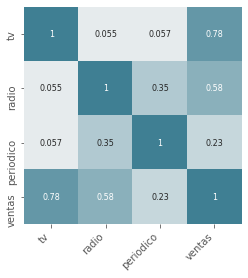

In [28]:
# Matriz de correlaciones

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)


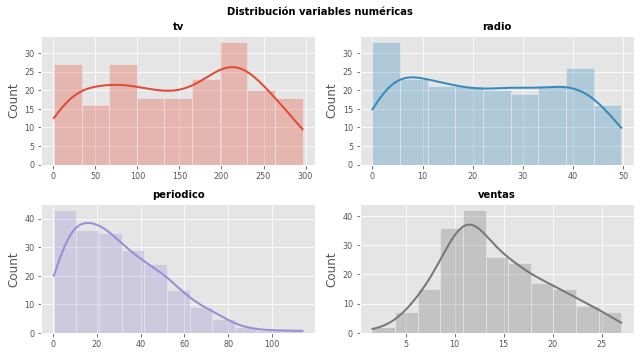

In [29]:
# Gráfico de distribución para cada variable numérica
# Ajustar número de subplots en función del número de columnas

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");


### 3. Ajuste del modelo

In [30]:
#Se ajusta un modelo lineal múltiple con el objetivo de predecir las ventas 
#en función de la inversión en los tres canales de publicidad.

# División de los datos en train y test

X = datos[['tv', 'radio', 'periodico']]
y = datos['ventas']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True)


In [31]:
# Creación del modelo utilizando el modo fórmula (similar a R)

# datos_train = pd.DataFrame(
#                     np.hstack((X_train, y_train)),
#                     columns=['tv', 'radio', 'periodico', 'ventas']
#               )
# modelo = smf.ols(formula = 'ventas ~ tv + radio + periodico', data = datos_train)
# modelo = modelo.fit()
# print(modelo.summary())


In [32]:
# Creación del modelo utilizando matrices como en scikitlearn
# A la matriz de predictores se le tiene que añadir una columna de 1s 
#para el intercept del modelo

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     437.8
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           1.01e-75
Time:                        15:57:12   Log-Likelihood:                -308.29
No. Observations:                 160   AIC:                             624.6
Df Residuals:                     156   BIC:                             636.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8497      0.365      7.803      0.0

El modelo con todas las variables introducidas como predictores tiene un  R2
alto (0.894), es capaz de explicar el 89.4% de la variabilidad observada en las ventas. El p-value del modelo es significativo (1.01e-75).

Acorde al p-value obtenido para el coeficiente parcial de regresión de periodico (0.723), esta variable no contribuye de forma significativa al modelo. Se entrena de nuevo el modelo, pero esta vez excluyendo el predictor periodico.

In [33]:
# Creación del modelo utilizando matrices
# Se elimina la columna periodico del conjunto de train y test
X_train = X_train.drop(columns = 'periodico')
X_test  = X_test.drop(columns = 'periodico')

# A la matriz de predictores se le tiene que añadir una columna de 1s para el
# intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     660.3
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           3.69e-77
Time:                        15:57:14   Log-Likelihood:                -308.36
No. Observations:                 160   AIC:                             622.7
Df Residuals:                     157   BIC:                             631.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9004      0.335      8.652      0.0

### 4. Intervalos de confianza

In [34]:
# Intervalos de confianza para los coeficientes del modelo

intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci


,2.5%,97.5%
const,2.238211,3.562549
tv,0.042439,0.048701
radio,0.172853,0.207942


### 5. Diagnóstico de los errores  

In [35]:
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train


### 5.1 Visualización

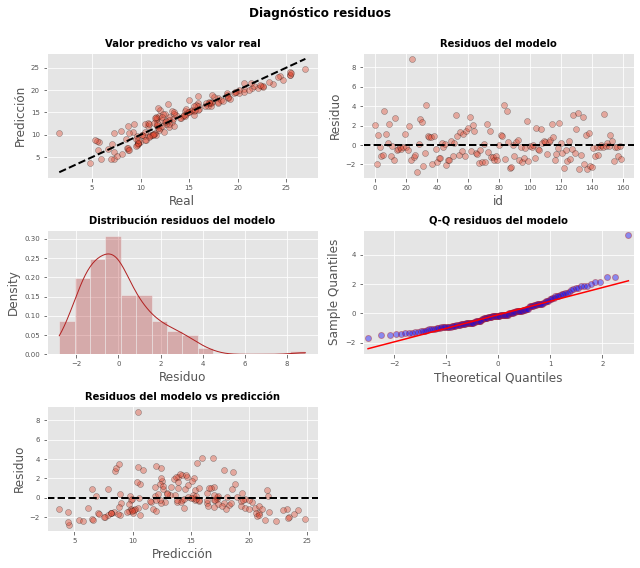

In [36]:
# Gráficos

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");


Los residuos no parecen distribuirse de forma aleatoria en torno a cero, sin mantener aproximadamente la misma variabilidad a lo largo del eje X. Este patrón apunta a una falta de homocedasticidad y de distribución normal.

### 5.2 Test de normalidad

Se comprueba si los residuos siguen una distribución normal empleando dos test estadísticos: Shapiro-Wilk test y D'Agostino's K-squared test. Este último es el que incluye el summary de statsmodels bajo el nombre de Omnibus.

En ambos test, la hipótesis nula considera que los datos siguen una distribución normal, por lo tanto, si el p-value no es inferior al nivel de referencia alpha seleccionado, no hay evidencias para descartar que los datos se distribuyen de forma normal.

In [37]:
# Normalidad de los residuos Shapiro-Wilk test

shapiro_test = stats.shapiro(residuos_train)
shapiro_test


ShapiroResult(statistic=0.9165118932723999, pvalue=5.86075366015848e-08)

In [38]:
# Normalidad de los residuos D'Agostino's K-squared test

k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")


Estadítico= 54.901056530391045, p-value = 1.1978075580038579e-12


Ambos test muestran claras evidencias para rechazar la hipótesis de que los datos se distribuyen de forma normal (p-value << 0.01).

### 6. Predicciones

In [39]:
# Predicciones con intervalo de confianza 

predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(5)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
146,15.231643,0.248325,14.741154,15.722132,11.880621,18.582665
32,7.615382,0.247198,7.127119,8.103645,4.264685,10.966079
43,13.928155,0.213535,13.506384,14.349927,10.586500,17.269810
99,17.001020,0.210052,16.586127,17.415913,13.660226,20.341814
88,11.779348,0.162610,11.458162,12.100533,8.448893,15.109802


### 7. Error de test

In [40]:
# Error de test del modelo 

X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")



El error (rmse) de test es: 1.695620750010119


### 8. Interpretación

El modelo de regresión lineal múltiple:

            ventas = 2.9004 + 0.0456tv + 0.1904radio
 
es capaz de explicar el 89.4% de la varianza observada en las ventas (R-squared: 0.894, Adj. R-squared: 0.892). El test  F
  es significativo (p-value: 3.69e-77). Por lo que hay evidencias claras de que el modelo es capaz de explicar la varianza en las ventas mejor de lo esperado por azar. Los test estadísticos para cada variable confirman que tv y radio están relacionadas con la cantidad de ventas y contribuyen al modelo.

No se satisfacen las condiciones de normalidad, por lo que los intervalos de confianza estimados para los coeficientes y las predicciones no son fiables.

El error (rmse) de test es de 1.696. Las predicciones del modelo final se alejan en promedio 1.696 unidades del valor real.